Patrick Forrester
Section 101

# Homework 7: Numerical Differentiation, Integration, Monte Carlo

##### ** Submit this notebook to bCourses to receive a credit for this assignment. **

Please complete this homework assignment in code cells in the iPython notebook. Include comments in your code when necessary. Enter your name in the cell at the top of the notebook, and rename the notebook [email_name]_HW07.ipynb, where [email_name] is the part of your UCB email address that precedes "@berkeley.edu" 

## Problem 1: Numerical integration [Ayars 2.2]

Compare results of the trapezoid integration method,  Simpson’s method, and the adaptive Gaussian quadrature method for the following integrals:

1. $$\int_0^{\pi/2}\cos x\, dx $$
1. $$\int_1^3 \frac{1}{x^2}\, dx $$
1. $$\int_2^4 (x^2+x+1)\, dx$$
1. $$\int_0^{6.9}\cos\left(\frac{\pi}{2}x^2\right)\, dx$$

For each part, try it with more and with fewer slices to determine how many slices are required to give an ‘acceptable’ answer. (If you double the number of slices and still get the same answer, then try half as many, etc.) Parts (3) and (4) are particularly interesting in this regard. In your submitted work, describe roughly how many points were required, and explain.

In [2]:
from pylab import *
from scipy import integrate
import scipy
#I'm considering 5 decimal places to be an 'acceptable answer.'
f = lambda x: cos(x)
print scipy.integrate.quad(f, 0, pi/2)
x = np.linspace(0, pi/2, 204)
y = cos(x)
y_int_trap = integrate.cumtrapz(y,x,initial = 0)
print round(y_int_trap[-1],5)
#so, 204 points were needed for the trap sum, which makes sense because trapezoids aren't very smooth like a cosine is.
x = np.linspace(0, pi/2, 23)
y = cos(x)
y_int_simp = integrate.simps(y,x)
print round(y_int_simp,5)
#So, only 23 points are needed to get the correct answer with Simpsons method, which makes sense as it is very efficient
#Now for the second integral:
f = lambda x: x**(-2)
print scipy.integrate.quad(f, 1, 3)
x = np.linspace(1, 3, 189)
y = x**(-2)
y_int_trap = integrate.cumtrapz(y,x,initial = 0)
print round(y_int_trap[-1],5)
#so, 189 points were needed for the trap sum
x = np.linspace(1,3, 23)
y = x**(-2)
y_int_simp = integrate.simps(y,x)
print round(y_int_simp,5)
#So, only 23 points are needed to get the correct answer with Simpsons method. It makes sense that this method would be much more efficient than the trap sum.
#Now for the 3rd integral
f = lambda x: x**2+x+1
print scipy.integrate.quad(f, 2,4)
x = np.linspace(2,4, 401)
y = x**2+x+1
y_int_trap = integrate.cumtrapz(y,x,initial = 0)
print round(y_int_trap[-1],5)
#so, 401 points were needed for the trap sum
x = np.linspace(2,4, 3)
y = x**2+x+1
y_int_simp = integrate.simps(y,x)
print round(y_int_simp,5)
#So, only 3 points are needed for simpsons method, since only 3 points are needed to define a parabola, which simpsons method uses as its basic unit.
#Repeating for the final integral
f = lambda x: cos(pi*x**2/2)
print scipy.integrate.quad(f, 0, 6.9)
x = np.linspace(0, 6.9, 2261)
y = cos(pi*x**2/2)
y_int_trap = integrate.cumtrapz(y,x,initial = 0)
print round(y_int_trap[-1],5)
#so, 2261 points were needed for the trap sum, since the function varies so rapidly
x = np.linspace(0, 6.9, 2541)
y = cos(pi*x**2/2)
y_int_simp = integrate.simps(y,x)
print round(y_int_simp,5)
#2541 points are needed for simpsons method. So, in this regime where we have high frequency sinosoidal oscillations, the trap sum is more efficient than Simpson's method.
#In general, the question boils down to would it be easier or harder to draw the function out of a bunch of trapezoids or a bunch of parabolas. For almost all cases,
#a parabola is an easier unit, particularly when you're trying to draw a parabola. A parabola is worse than a trapezoid, however, when the function changes so rapidly, that 
#we can just forget about the rounded portion at the local maxima and minima, and truncate it with the trapezoid.

(0.9999999999999999, 1.1102230246251564e-14)
1.0
1.0
(0.6666666666666667, 2.9064751454420587e-12)
0.66668
0.66668
(26.666666666666664, 2.9605947323337506e-13)
26.66667
26.66667
(0.47322531435151366, 1.9407006950934752e-10)
0.47323
0.47323


## Problem 2: Numerical differentiation [Ayars 2.8]

Write a function that, given a list of abscissa values $x_i$ and function values $f_i(x_i)$, returns a list of values of the second derivative $f''(x_i)$ of the function. Test your function by giving it a list of known function values for $\sin(x)$ and making a graph of the differences between the output of the function and $−\sin(x)$. Compare your output to Python's *scipy.misc.derivative*


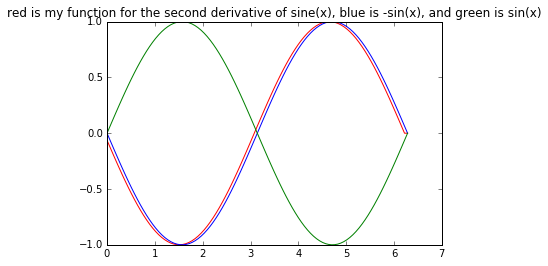

 so we see that the two graphs are pretty close to each other.
 We can see this by plotting the difference.


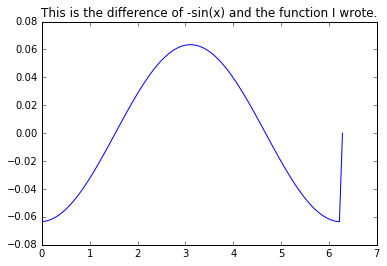

In [6]:
x = np.linspace(0,2*pi,100)
y = np.sin(x)

#I'm just going to use the code from the previous workshop
def f2(x,y):
    f1 = [0.0]*len(x)
    for i in range(len(y)-1):
        f1[i] = (y[i+1]-y[i])/(x[i+1]-x[i])
    f1[-1] = (y[-1] - y[-2])/(x[-1]-x[-2])
    f2 = [0.0]*len(x)
    for i in range(len(f1)-1):
        f2[i] = (f1[i+1]-f1[i])/(x[i+1] -x[i])
    f2[-1] = (f1[-1] - f1[-2])/(x[-1]-x[-2])
    return f2
sin2 = f2(x,y)
plt.figure()
plt.plot(x,sin2,'r-')
plt.plot(x, -np.sin(x), 'b-')
plt.plot(x,y, 'g-')
plt.title('red is my function for the second derivative of sine(x), blue is -sin(x), and green is sin(x)')
plt.show()
print ' so we see that the two graphs are pretty close to each other.'
print ' We can see this by plotting the difference.'
plt.figure()
plt.plot(x,sin2+np.sin(x))
plt.title('This is the difference of -sin(x) and the function I wrote.')
plt.show()

## Problem 3: MC integration [similar to Ayars 6.1]

Find the volume of the intersection of a sphere and an infinite cylinder, using
Monte Carlo techniques. The sphere has radius 1 and is centered at
the origin. The cylinder has radius 1, its axis is parallel
to the $z$ axis, and and goes through the point $(1, 0, 0)$. Report your uncertainty.

In [3]:
import numpy as np
def f(x,y):
    return (1-x**2 -y**2)**.5
    
def g(x):
    return (1-(x-1)**2)**.5
#lets take some random numbers in the first quadrant in the unit cube, we'll use just the first quandrant then multiply by 4 at the end.

#We now define a function that picks some random xs, ys and zs and see if they're within our volume or not. If they're in we count them, if not, we chuck them.
def area_enclosed_approx(N):
    xs = np.random.rand(N)
    ys = np.random.rand(N)
    zs = np.random.rand(N)
    a = np.vstack((xs,ys,zs))
    hits = []
    for i in range(0,N):
        if f(a[0,i],a[1,i]) > a[2,i] and g(a[0,i])>a[1,i]:
            hits.append(a[2,i])
    h = float(len(hits))
    quarter_area_approx = h/N
    return quarter_area_approx*4

print area_enclosed_approx(50000)
print r'I estimate the uncertainty of this techinque to be \approx 4/\sqrt(N), which for the printed case is ' + str(4*(50000**(-.5)))

1.69472
I estimate the uncertainty of this techinque to be \approx 4/\sqrt(N), which for the printed case is 0.01788854382


/projects/sage/sage-6.10/local/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in double_scalars
  app.launch_new_instance()


## Problem 4: MC integration [similar to Ayars 6.2]

The “volume” of a 2-sphere $x^2 + y^2 \le r^2$ (a.k.a. a “circle”) is $(1)\pi r^2$. The volume of a 3-sphere $x^2 + y^2 + z^2 \le r^2$ is $4/3 \pi r^3$. The equation for an N-sphere is $x_1^2 +x_2^2 +x_3^2 + ... + x_N^2 \le r^2$ (where $x_i$ are spatial coordinates in $N$ dimensions). We can guess, by induction from the 2-dimensional and 3-dimensional cases, that the “volume” of an N-sphere is $\alpha_N\pi r^N$. Write a function that uses Monte Carlo integration to estimate $\alpha_N$ and its uncertainty for a fixed $N$. Graph $\alpha_N$ with its uncertainty as a function of $N$ for $N=4..10$. 

/projects/sage/sage-6.10/local/lib/python2.7/site-packages/ipykernel/__main__.py:28: RuntimeWarning: invalid value encountered in double_scalars


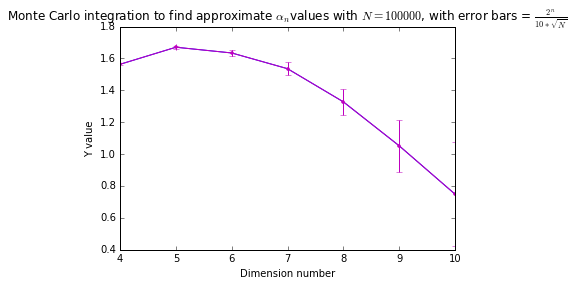

In [38]:
import matplotlib.pyplot as plt
def alpha_n_approx(n, N):
    #Let's make a list of all the x, y .... n - 1 coordinates
    coordinates = [] 
    # And a list of the points for the last coordinate
    x_ns = np.random.rand(N)
    # We generate N number of points with random x, y.... n-1 points. But now each array should be x,y so length n
    for i in range(0, N):
        x_i = np.random.rand(n -1)
        coordinates.append(x_i)
    hits = numberOfHits(coordinates, x_ns)
    quarter_area_approx = hits / float(N)
    return (2**n)* quarter_area_approx/np.pi


def numberOfHits(coordinates, z):
    tally = 0
    for i in range(0, len(coordinates)):
        sum = f(coordinates[i])
        if sum > z[i]:
            tally += 1
    return (tally) 

def f(point):
    sum = 1
    for i in range(0, len(point)):
        sum -=  (point[i] ** 2)
    return sum ** (0.5)
#This is just my guess at the uncertainty. MC stuff usually goes down by 1/sqrt(N) and as we go up in n, we multipy by 2**n, so it should at least be the right shape. I then add a proportinallity constant, to make it look better.
def uncertainty(n,N):
    return (2**n)*(N**-.5)/10
x  = range(4,11)
y = []
for i in x:
    y.append(alpha_n_approx(i,100000))
    
errors = []
for i in x:
    errors.append(uncertainty(i,100000))
    

plt.figure()
plt.title(r'Monte Carlo integration to find approximate $\alpha_n $values with $N = 100000$, with error bars = $\frac{2^n}{10*\sqrt{N}}$')
plt.xlabel('Dimension number')
plt.ylabel('Y value')
plt.plot(x,y)
plt.errorbar(x,y, xerr=0,yerr=errors, fmt = 'm.-')
plt.show()

